In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from matplotlib import pyplot as plt
from world import World
from agents import RandomAgent, ThompsonAgent, UCBAgent
import numpy as np

In [15]:
k = 10
world = World(k)

In [17]:
random_agent_rewards = []
ucb_agent_rewards = []
thompson_agent_rewards = []
random_agent = RandomAgent(k)
ucb_agent = UCBAgent(k)
thompson_agent = ThompsonAgent(k)
steps = 1_000
for step in range(steps):
    
    action = random_agent.act()
    _, reward, _, _ = world.step(action)
    random_agent_rewards.append(reward)
    random_agent.update(action, reward)
    
    action = ucb_agent.act()
    _, reward, _, _ = world.step(action)
    ucb_agent_rewards.append(reward)
    ucb_agent.update(action, reward)

    action = thompson_agent.act()
    _, reward, _, _ = world.step(action)
    thompson_agent_rewards.append(reward)
    thompson_agent.update(action, reward)

avg_random_agent_rewards = np.cumsum(random_agent_rewards) / np.arange(1, steps + 1)
avg_ucb_agent_rewards = np.cumsum(ucb_agent_rewards) / np.arange(1, steps + 1)
avg_thompson_agent_rewards = np.cumsum(thompson_agent_rewards) / np.arange(1, steps + 1)

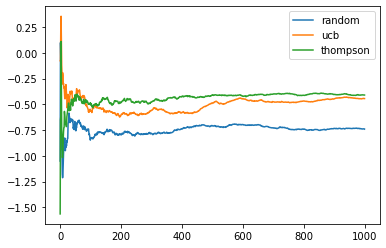

In [18]:
plt.plot(avg_random_agent_rewards, label="random")
plt.plot(avg_ucb_agent_rewards, label="ucb")
plt.plot(avg_thompson_agent_rewards, label="thompson")
plt.legend()

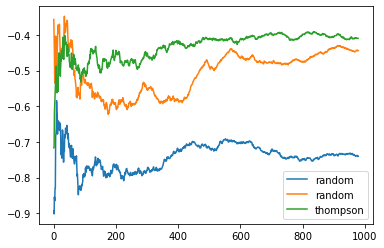

In [19]:
plt.plot(avg_random_agent_rewards[20:], label="random")
plt.plot(avg_ucb_agent_rewards[20:], label="random")
plt.plot(avg_thompson_agent_rewards[20:], label="thompson")
plt.legend()